In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('customer_segmentation.csv')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
df = df.drop(['ID','Dt_Customer'],axis=1)

In [9]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0


In [12]:
for col in df.columns:
    nan_val = df[col].isnull().sum()
    print('The number of nan values in column',col,'is',nan_val)

The number of nan values in column Year_Birth is 0
The number of nan values in column Education is 0
The number of nan values in column Marital_Status is 0
The number of nan values in column Income is 24
The number of nan values in column Kidhome is 0
The number of nan values in column Teenhome is 0
The number of nan values in column Recency is 0
The number of nan values in column MntWines is 0
The number of nan values in column MntFruits is 0
The number of nan values in column MntMeatProducts is 0
The number of nan values in column MntFishProducts is 0
The number of nan values in column MntSweetProducts is 0
The number of nan values in column MntGoldProds is 0
The number of nan values in column NumDealsPurchases is 0
The number of nan values in column NumWebPurchases is 0
The number of nan values in column NumCatalogPurchases is 0
The number of nan values in column NumStorePurchases is 0
The number of nan values in column NumWebVisitsMonth is 0
The number of nan values in column Accep

In [13]:
X = df.iloc[:,:].values

In [14]:
# we need to handle missing values for only income column we can do that by average
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
X[:,3:4]=imputer.fit_transform(X[:,3:4])

In [15]:
# time for feature sacling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X[:,3:]=sc.fit_transform(X[:,3:])
X[:,0:1]=sc.fit_transform(X[:,0:1])

In [16]:
print(X[0])

[-0.9853447295662224 'Graduation' 'Single' 0.23532677201008734
 -0.8252176496158384 -0.9298943792539407 0.30703926349227456
 0.9837812651523129 1.5515769812186038 1.6797023326128684
 2.4621470460734924 1.4765001000700189 0.8432069073861739
 0.349413940993261 1.409303937080072 2.5108902417547814
 -0.5507847897348009 0.6939037392619777 -0.2801402771248674
 -0.2838301877786302 -0.2801402771248674 -0.26211121699831136
 -0.1165103456070926 -0.09728166526882823 0.0 0.0 2.3888463379521307]


In [17]:
# time for handling categorcical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers =[("encoder",OneHotEncoder(),[1,2])],remainder='passthrough')
X = np.array(ct.fit_transform(X))

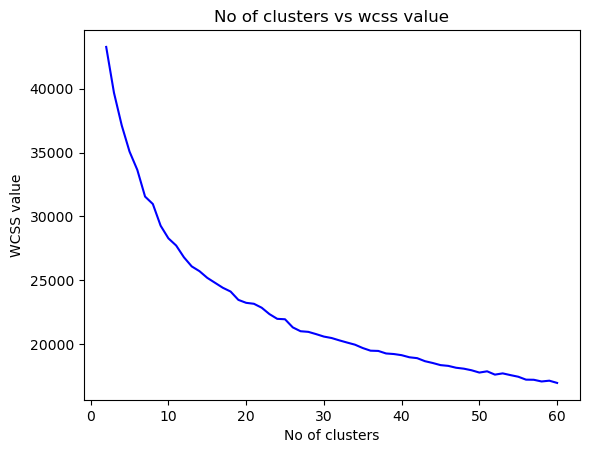

In [24]:
import warnings
warnings.filterwarnings('ignore')
# finding best k value for implementing k means using wcss
wcss = []
from sklearn.cluster import KMeans
for k in range(2,61):
    model = KMeans(n_clusters = k,init='k-means++',random_state =0)
    model.fit(X)
    wcss.append(model.inertia_)

# plotting wcss value against clusters
plt.plot(range(2,61),wcss,c='blue')
plt.xlabel('No of clusters')
plt.ylabel('WCSS value')
plt.title('No of clusters vs wcss value')
plt.show()

In [25]:
# finalizing k value as 28
model = KMeans(n_clusters=28,init='k-means++',random_state =0)
model.fit(X)
y_means=model.labels_

In [26]:
y_means

array([23,  8,  4, ..., 22,  4, 14])

In [27]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X,y_means)
print(score)

0.10706108090802365


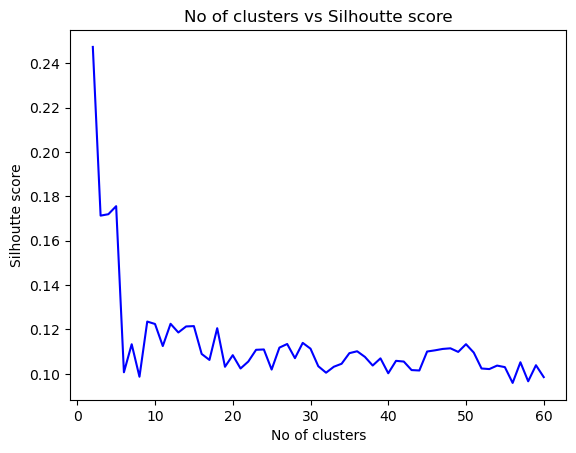

In [30]:
# lets check the best k for silhouette scores
scores = []
for k in range(2,61):
    model = KMeans(n_clusters = k,init='k-means++',random_state =0)
    model.fit(X)
    test_means = model.labels_
    score = silhouette_score(X,test_means)
    scores.append(score)

# plotting silhouettee score against clusters
plt.plot(range(2,61),scores,c='blue')
plt.xlabel('No of clusters')
plt.ylabel('Silhoutte score')
plt.title('No of clusters vs Silhoutte score')
plt.show()   

In [31]:
model = KMeans(n_clusters = 2,init='k-means++',random_state =0)
model.fit(X)
y_means = model.labels_
score = silhouette_score(X,y_means)
print(score)

0.24735242766290233
